
<br>
School: University of California, Berkeley<br>
Course: BIOENG 145/245<br>
Author: Yorick Chern<br>
Instructor: Liana Lareau<br>
Assignment 2<br>


In [23]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

some helper functions - do not change anything here

In [24]:
def pdf(x, mean, cov):
    return multivariate_normal.pdf(x, mean, cov)

In [25]:
def make_data(n_samples, features, k_classes, sep=2.0):
    centers = np.random.rand(k_classes, features)
    for i in range(k_classes):
        centers[i] += sep * i
    stds = np.ones_like(centers)
    X, y = make_blobs(
        n_samples=n_samples,
        n_features=features,
        centers=centers,
        cluster_std=stds
    )
    return X, y

In [26]:
class GaussianDiscriminator:
    def __init__(self):
        self.gaussians = []     # stores the (class_label, mean, covariance) tuples
    def fit(self, X, y, num_classes):
        """
        This function fits a Gaussian distribution to each class in the dataset.
	These Gaussian distributions are appended to self.gaussians as a tuple consisting of (class_label, mean, covariance)
        Inputs
        - X: the data, numpy array with shape (n, d) = (sample size, feature dims)
        - y: the class labels, numpy array with shape (n, ) and integers from 0, ..., num_classes-1 
        - num_classes: the number of classes, int
        Outputs
        - None
        """

        # iterate through each class and find its mean and covariance matrix
        # HINT: use np.mean, np.cov, and np.where.
        # save the class k, the mean of the class sample, and covariance matrix of the class sample as a tuple
        # and append it to self.gaussians
        # self.gaussians.append((k, mean, cov))
        
        for n in range(num_classes):
            new_X = X[np.where(y == n)]
            
            # mean
            mean = np.mean(new_X, axis = 0)
            
            # covariance
            cov = np.cov(new_X.T)
            
            self.gaussians.append((n, mean, cov))

In [27]:
    def predict(self, x):
        """
        This function will classify the dataset x, returning a predicted label for each datapoint.
        Inputs
        - x: data to be predicted, numpy array with shape (n, d) = (sample size, feature dims)
        Outputs
        - pred: np.array with shape (n, ), where each item is the classification of each data
        """
        pred = []
        # iterate through each data
        for i in range(x.shape[0]):
        	# for each data iterate through each gaussian in self.gaussian
        	# find the pdf using the helper function provided above
        	# HINT: remember, in Python, tuples can be decomposed like so
        	# a, b, c = (a, b, c)
            max_pdf = 0
            max_pdf_class = None
            
            for n, mean, cov in self.gaussians:
                temp = pdf(x[i], mean, cov)
                if temp > max_pdf:
                    max_pdf = temp
                    max_pdf_class = n
            pred.append(max_pdf_class)
        return np.array(pred)

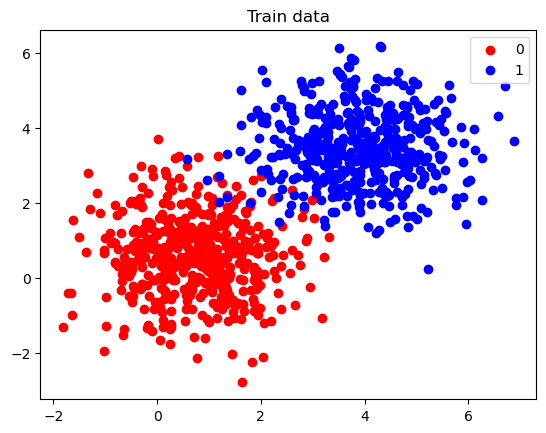

AttributeError: 'GaussianDiscriminator' object has no attribute 'predict'

In [28]:
if __name__ == '__main__':

	# do not make any modifications here, it's a simple visualization for your implementation.
    X, y = make_data(1200, 2, 2, sep=3.0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    idx = np.where(y_train == 0)[0]
    plt.scatter(X_train[idx, 0], X_train[idx, 1], label='0', color='r')
    idx = np.where(y_train == 1)[0]
    plt.scatter(X_train[idx, 0], X_train[idx, 1], label='1', color='b')
    plt.legend()
    plt.title("Train data")
    plt.show()  # click on "x" to exit out the graph and continue running the program

    gd = GaussianDiscriminator()
    gd.fit(X_train, y_train, 2)

    y_pred = gd.predict(X_test)
    print(accuracy_score(y_test, y_pred))


    idx = np.where(y_test == 0)[0]
    plt.scatter(X_test[idx, 0], X_test[idx, 1], label='0', color='r')
    idx = np.where(y_test == 1)[0]
    plt.scatter(X_test[idx, 0], X_test[idx, 1], label='1', color='b')
    plt.legend()
    plt.title("Test data & predictions")
    plt.show()
